In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data Cleaning

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
df = df.drop_duplicates()

In [6]:
df.shape

(302, 14)

In [7]:
df = df.dropna()

In [8]:
df.shape

(302, 14)

# Data Integration

In [9]:
subset1 = df[['age','cp','chol','thalachh']]
subset2 = df[['exng','slp','output']]

In [10]:
df_merge = pd.concat([subset1,subset2],axis=1)

In [11]:
df_merge

,age,cp,chol,thalachh,exng,slp,output
0,63,3,233,150,0,0,1
1,37,2,250,187,0,0,1
2,41,1,204,172,0,2,1
3,56,1,236,178,0,2,1
4,57,0,354,163,1,2,1
...,...,...,...,...,...,...,...
298,57,0,241,123,1,1,0
299,45,3,264,132,0,1,0
300,68,0,193,141,0,1,0
301,57,0,131,115,1,1,0


# Error Correcting

In [12]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5 * IQR
    outlier_mask = (column < Q1 - threshold) | (column > Q3 + threshold)
    return column[~outlier_mask]

In [13]:
col_name = ['cp','thalachh','exng','oldpeak','slp','caa']
for col in col_name:
    df[col] = remove_outliers(df[col])

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

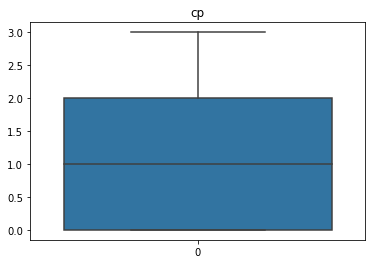

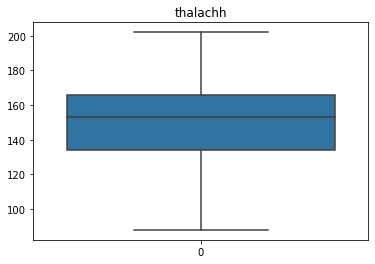

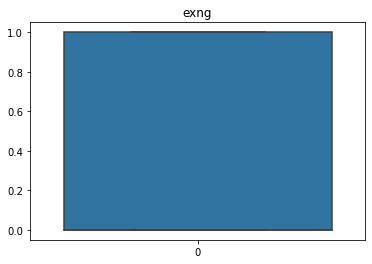

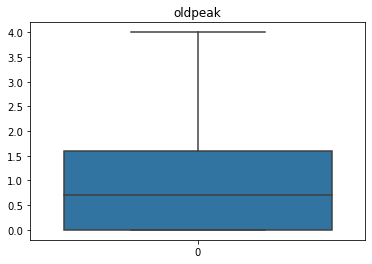

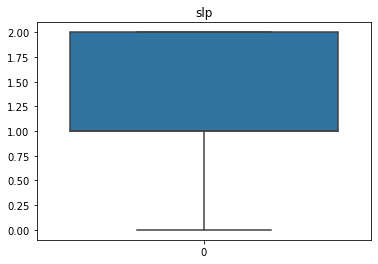

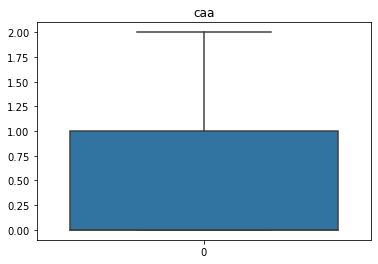

In [16]:
for col in col_name:
    sns.boxplot(data = df[col])
    plt.title(col)
    plt.show()

# Data Transformation

In [25]:
df = df.dropna()

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
x = df.drop('output',axis=1)
y = df.output



from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [29]:
x_train.shape,x_test.shape

((220, 13), (55, 13))

In [31]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

# Data Model Building

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
model = RandomForestClassifier()

In [36]:
model.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [40]:
y_pred = model.predict(x_test_scaled)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
acc = accuracy_score(y_test,y_pred)

In [43]:
acc

0.8545454545454545